# Projet 2 :

# Analysez des données de systèmes éducatifs

# Salma CHAFAI

## Enoncé et objectifs

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.
Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

Quels sont les pays avec un fort potentiel de clients pour nos services ?
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Dans quels pays l'entreprise doit-elle opérer en priorité ?

**Mission :**

Quels sont les pays avec un fort potentiel de clients pour nos services ?

Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

Dans quels pays l'entreprise doit-elle opérer en priorité ?

**$\bullet$** Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

**$\bullet$** Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

**$\bullet$** Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

**$\bullet$** Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## A) Importation des bibliothèques essentiels 

In [1]:
#!pip install missingno
#!pip install plotly

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import missingno as msn
import plotly.graph_objects as go
import plotly as plo
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot

- Version des packages

In [3]:
print('version de numpy : ',np.__version__)
print('version de pandas : ',pd.__version__)
print('version de seaborn : ',sns.__version__)
print('version de matplotlib : ',mp.__version__)
print('version de missingo : ',msn.__version__)
print('version de plotly : ',plo.__version__)

version de numpy :  1.19.2
version de pandas :  1.1.3
version de seaborn :  0.11.0
version de matplotlib :  3.3.2
version de missingo :  0.5.0
version de plotly :  5.4.0


## B) Les jeux de données 

On va commencer par télécharger les 5 jeux de données, les afficher et voir leurs caractéristiques

### 1)  Importation des 5 jeux de données

In [4]:
EdStatsCountry = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 2/Data/EdStatsCountry.csv") 
EdStatsCountry_Series = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 2/Data/EdStatsCountry-Series.csv") 
EdStatsData = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 2/Data/EdStatsData.csv") 
EdStatsFootNote = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 2/Data/EdStatsFootNote.csv") 
EdStatsSeries = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 2/Data/EdStatsSeries.csv") 

### 2)  Visualisation et premiers pas

#### (a) Visualisation

In [5]:
# Le premier jeu de données
EdStatsCountry.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [6]:
# Le deuxième jeu de données
EdStatsCountry_Series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [7]:
# Le troisième jeu de données
EdStatsData.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [8]:
# Le quatrième jeu de données
EdStatsFootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [9]:
# Le dernier jeu de données
EdStatsSeries.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

#### (b) Analyse des jeux de dpnnées

In [10]:
# La taille des données
print('taille du premier jeu de données:',EdStatsCountry.shape)
print('taille du deuxième jeu de données:',EdStatsCountry_Series.shape)
print('taille du troisième jeu de données:',EdStatsData.shape)
print('taille du quatrième jeu de données:',EdStatsFootNote.shape)
print('taille du dernier jeu de données:',EdStatsSeries.shape)

taille du premier jeu de données: (241, 32)
taille du deuxième jeu de données: (613, 4)
taille du troisième jeu de données: (886930, 70)
taille du quatrième jeu de données: (643638, 5)
taille du dernier jeu de données: (3665, 21)


- Le jeu de données **EdStatsCountry** contient 241 lignes et 32 colonnes. Les lignes représentent les pays, régions ou groupes géographiques et les colonnes représentent leurs noms, codes et des informations économiques.

- Le jeu de données **EdStatsCountry_Series** contient 613 lignes et 4 colonnes. Les lignes représentent les pays, régions ou groupes géographiques et les colonnes représentent leurs codes et une description des sources des données.

- Le jeu de données **EdStatsData** contient 886930 lignes et 70 colonnes. Les lignes représentent chaques pays, régions et groupes géographiques et les colonnes représentent les indicateurs de chaque pays et les années d'évolution.

- Le jeu de données **EdStatsFootNote** contient 643638 lignes et 5 colonnes. Les lignes représentent les pays/région et les colonnes représentent les series codes et les années de la description de chaque ligne et

- Le jeu de données **EdStatsSeries**, on a des informations sur les indicateurs, leurs sources, leurs codes. On a 3665 lignes(Indicateurs) et 21 colonnes (des informations concernant les indicateurs)

In [11]:
# Informations générales du premier jeu de données : Taille, type et mémoire 
EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [12]:
# Informations générales du deuxième jeu de données : Taille, type et mémoire 
EdStatsCountry_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [13]:
# Informations générales du troisième jeu de données : Taille, type et mémoire 
EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [14]:
# Informations générales du quatrième jeu de données : Taille, type et mémoire 
EdStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [15]:
# Informations générales du dernier jeu de données : Taille, type et mémoire 
EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [16]:
# Les types de colonnes du premier jeu de données
EdStatsCountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [17]:
# Les types de colonnes du deuxième jeu de données
EdStatsCountry_Series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [18]:
# Les types de colonnes du troisième jeu de données
EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [19]:
# Les types de colonnes du quatrième jeu de données
EdStatsFootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [20]:
# Les types de colonnes du dernier jeu de données
EdStatsSeries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [21]:
# Statistiques du premier jeu de données
EdStatsCountry_Series.describe()

Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

### Il- Nettoyage des données

#### (a) Le pourcentage de valeurs nulls dans chaque jeu de données

 - Premier jeu de données

In [22]:
# Pourcentage des valeurs null dans chaque colonne
v_m1 = (EdStatsCountry.isna().sum()/EdStatsCountry.shape[0])*100
v_m1

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

Text(0.5, 1.0, 'Le taux de remplissage des colonnes du premier jeu de données')

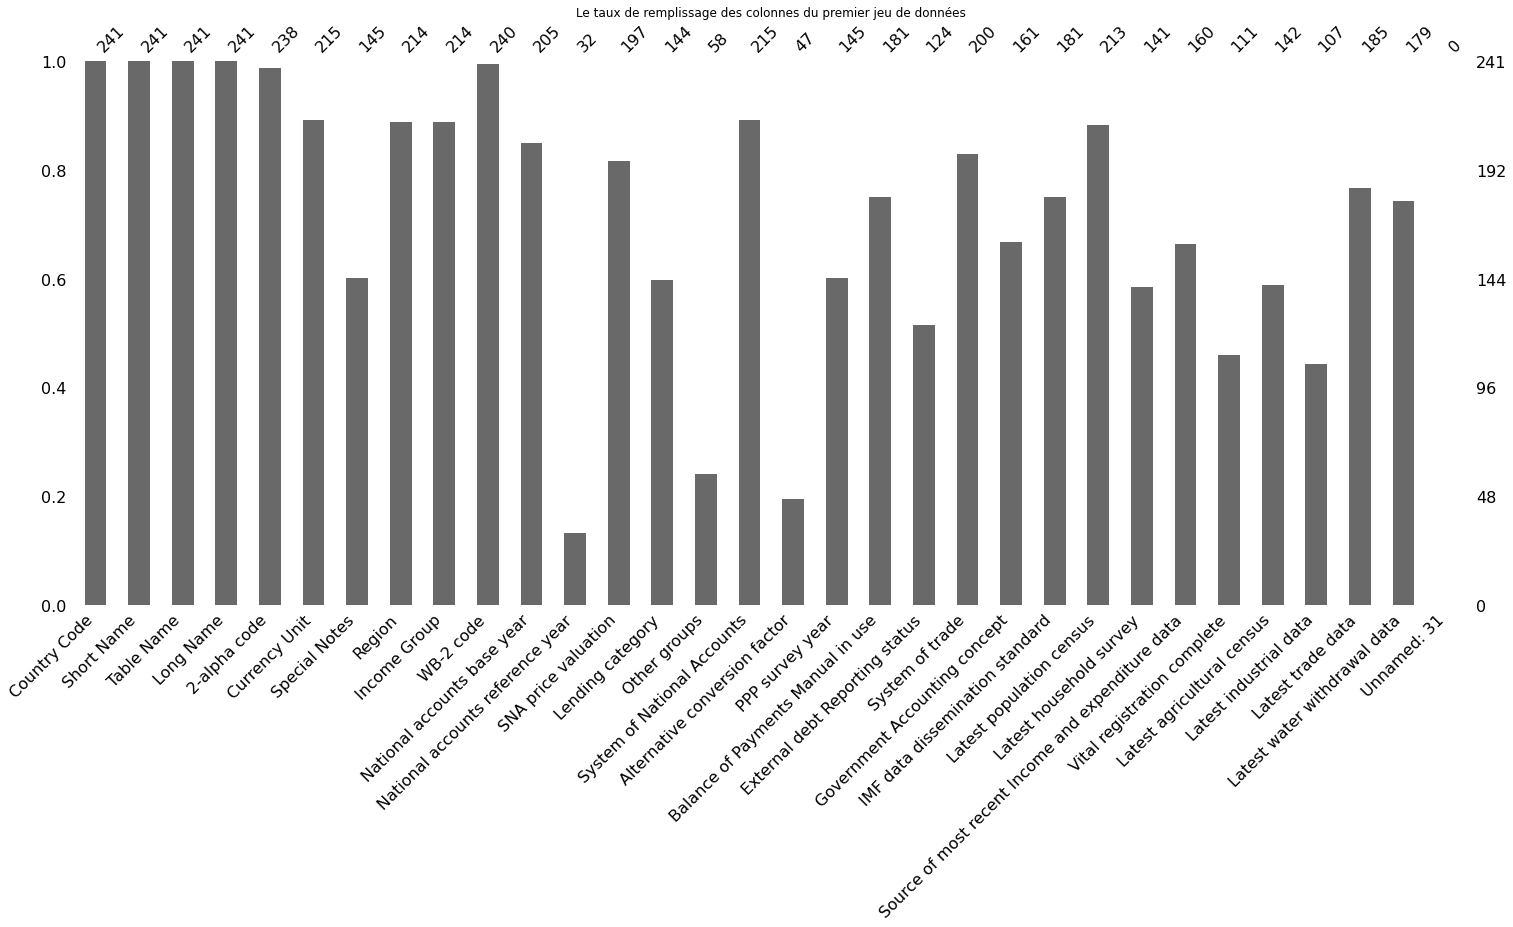

In [23]:
# On affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsCountry)
plt.title('Le taux de remplissage des colonnes du premier jeu de données')

 - Deuxième jeu de données

<AxesSubplot:title={'center':'Le taux de remplissage des colonnes du deuxième jeu de données'}>

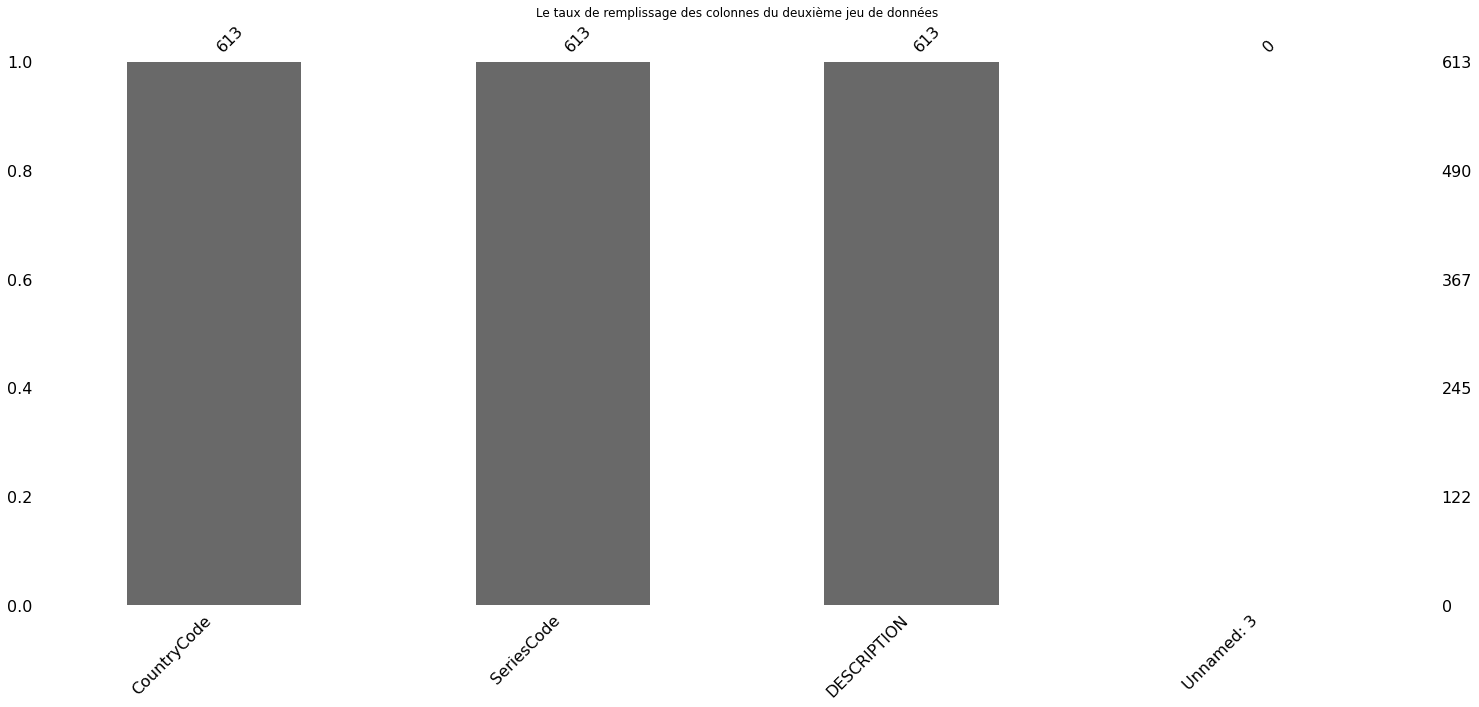

In [24]:
# On affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
plt.title('Le taux de remplissage des colonnes du deuxième jeu de données')
msn.bar(EdStatsCountry_Series)


 - Troisième jeu de données

Text(0.5, 1.0, 'Le taux de remplissage des colonnes du troisième jeu de données')

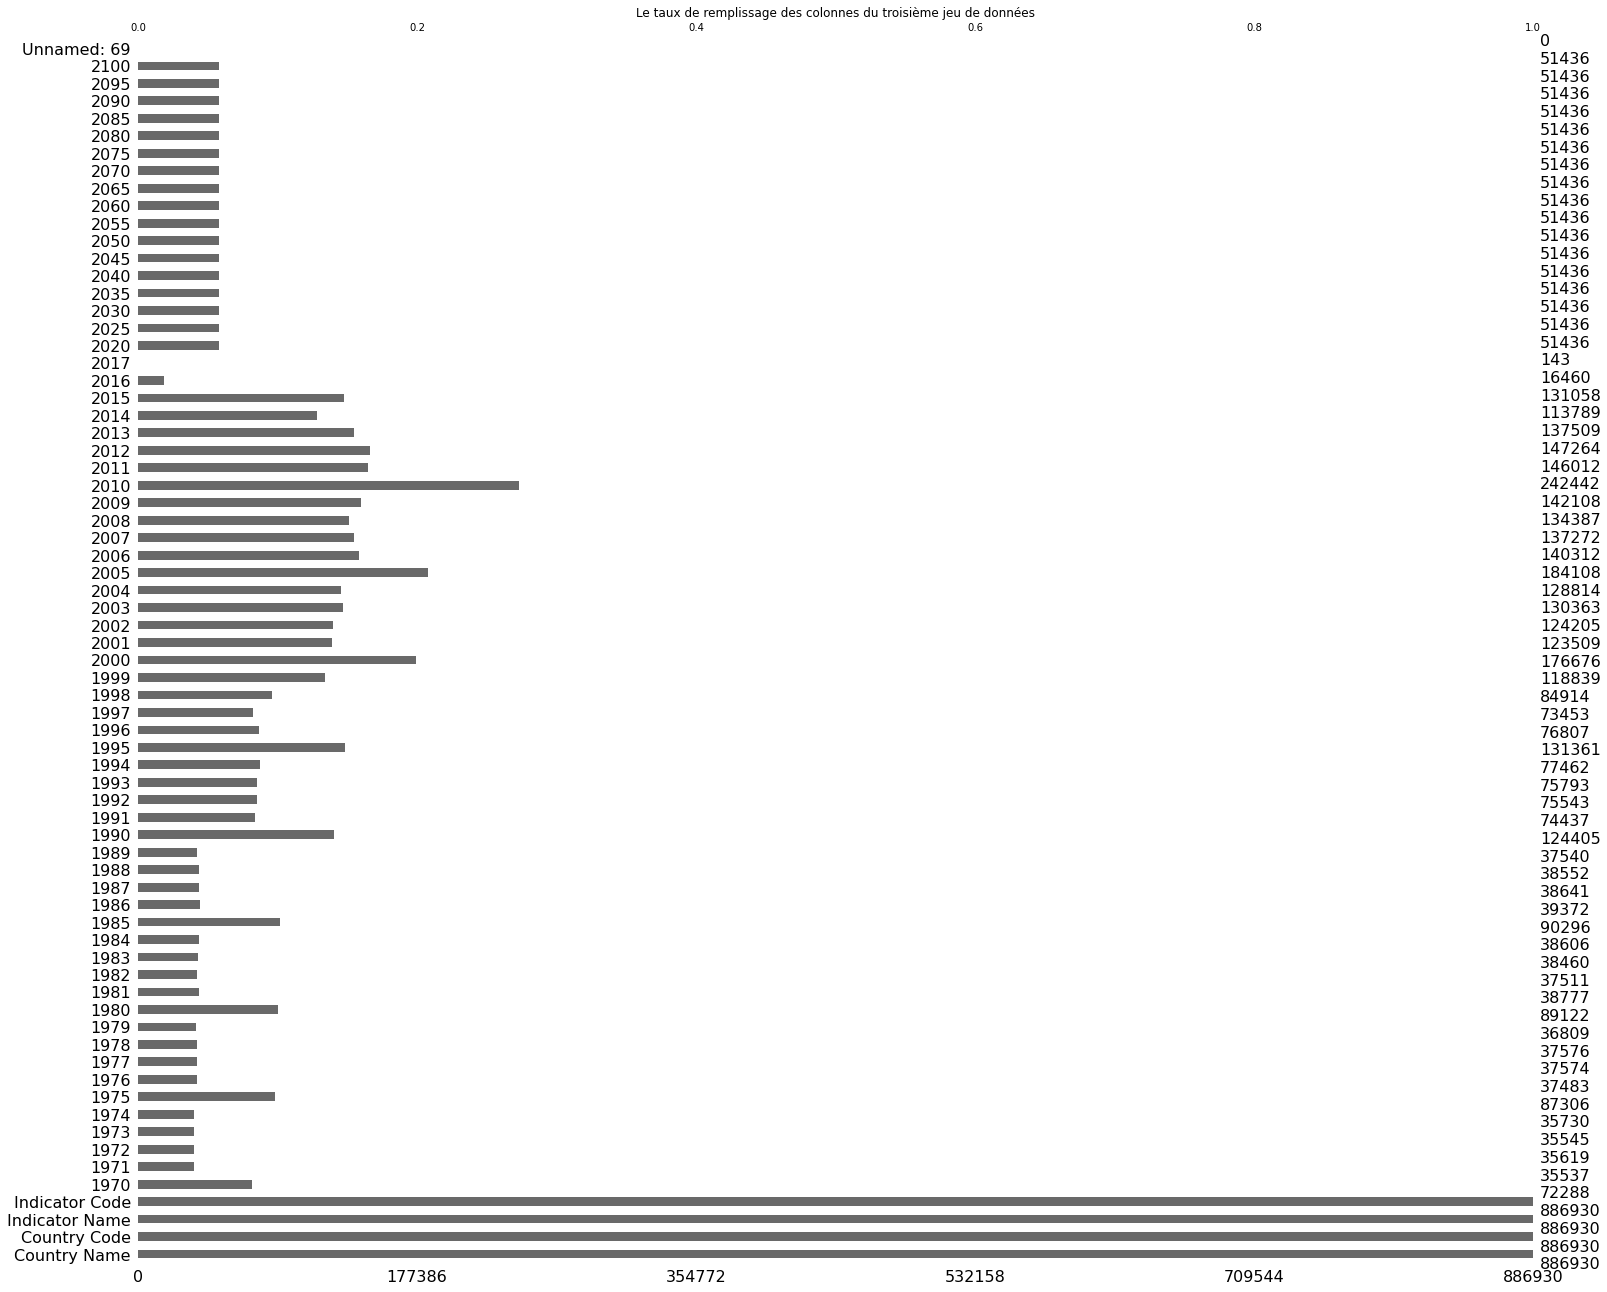

In [25]:
# On affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsData)
plt.title('Le taux de remplissage des colonnes du troisième jeu de données')

 - Quatrième jeu de données

Text(0.5, 1.0, 'Le taux de remplissage des colonnes du Quatrième jeu de données')

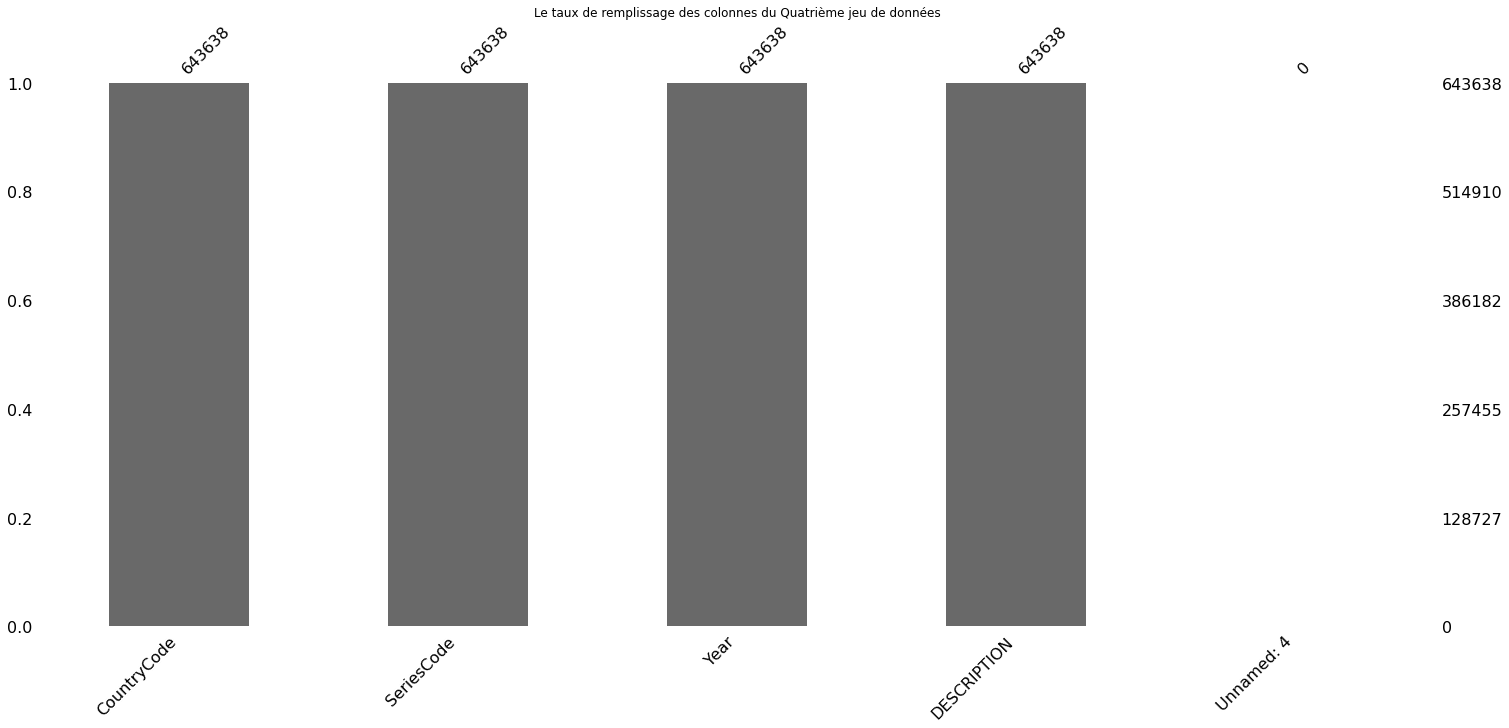

In [26]:
# On affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsFootNote)
plt.title('Le taux de remplissage des colonnes du Quatrième jeu de données')

 - Dernier jeu de données

Text(0.5, 1.0, 'Le taux de remplissage des colonnes du dernier jeu de données')

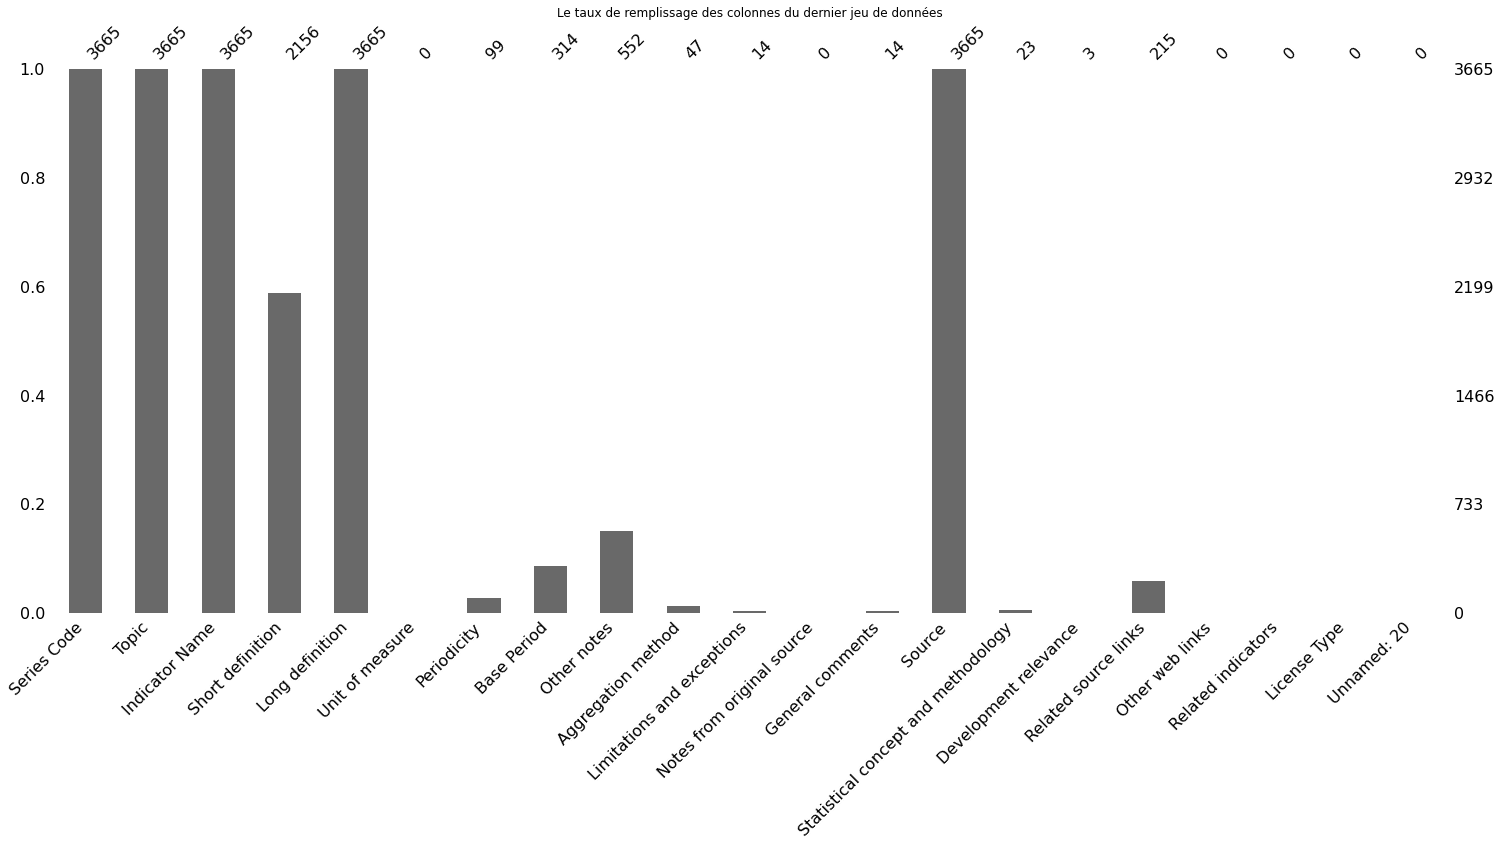

In [27]:
# On affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsSeries)
plt.title('Le taux de remplissage des colonnes du dernier jeu de données')

#### (b) Nettoyage des données

 - Premier jeu de données

<AxesSubplot:>

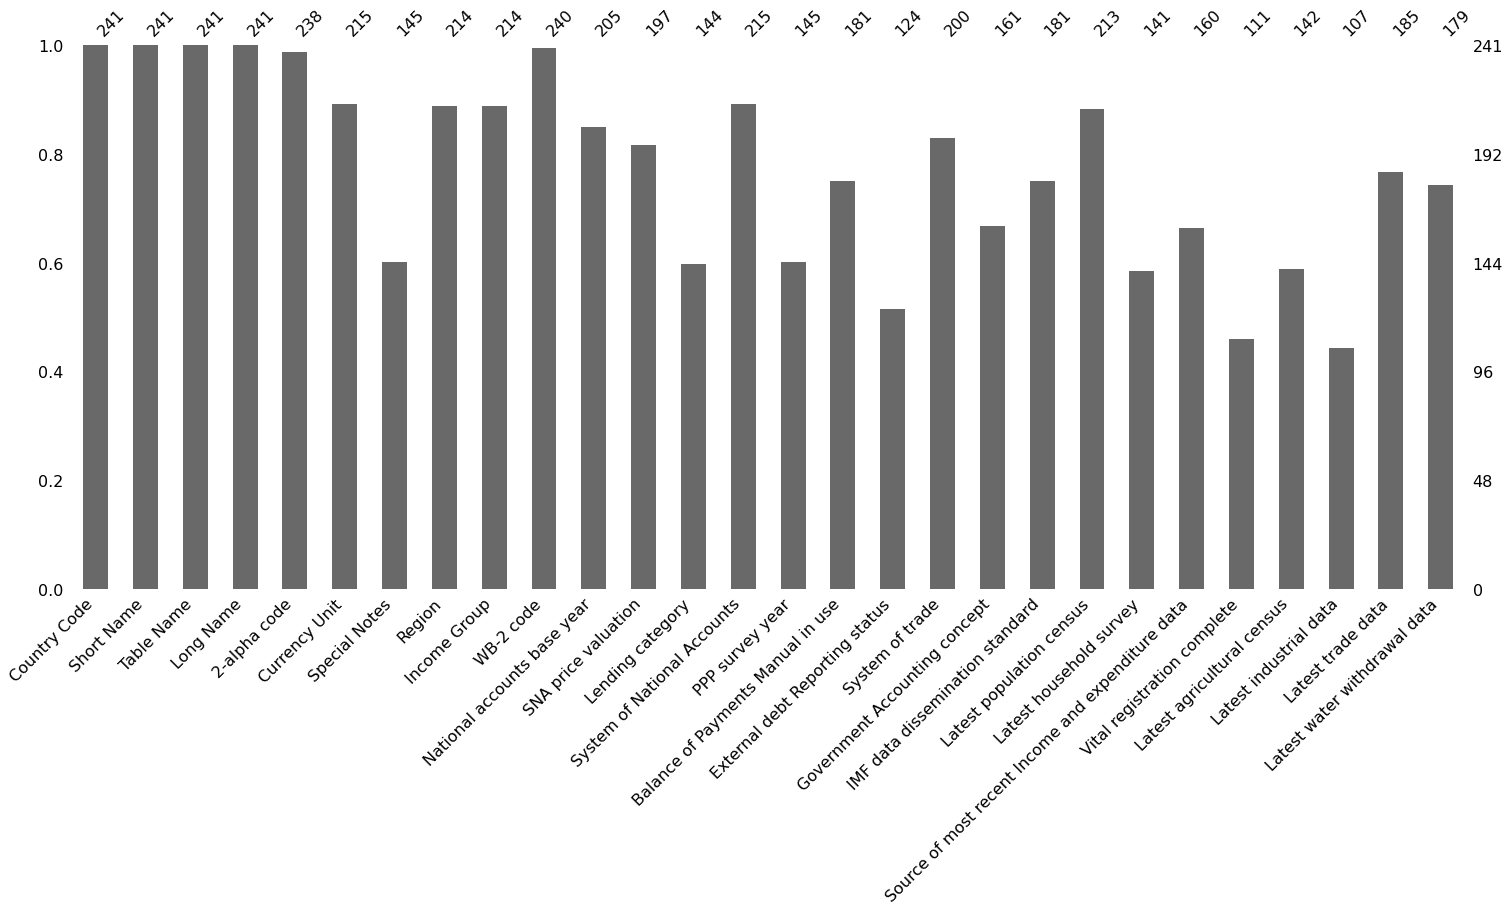

In [28]:
# A revoir si je refait avec la méthode vu dans la v4

EdStatsCountry_mod = EdStatsCountry.copy()
EdStatsCountry_mod = EdStatsCountry_mod.drop(columns=['National accounts reference year','Other groups',
                                                      'Alternative conversion factor','Unnamed: 31'])
# On ré-affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsCountry_mod)

In [29]:
# Statistiques du premier jeu de données
EdStatsCountry_mod.describe()

Latest industrial data  Latest trade data
count              107.000000         185.000000
mean              2008.102804        2010.994595
std                  2.616834           2.569675
min               2000.000000        1995.000000
25%               2007.500000        2011.000000
50%               2009.000000        2012.000000
75%               2010.000000        2012.000000
max               2010.000000        2012.000000

 - Deuxième jeu de données

<AxesSubplot:>

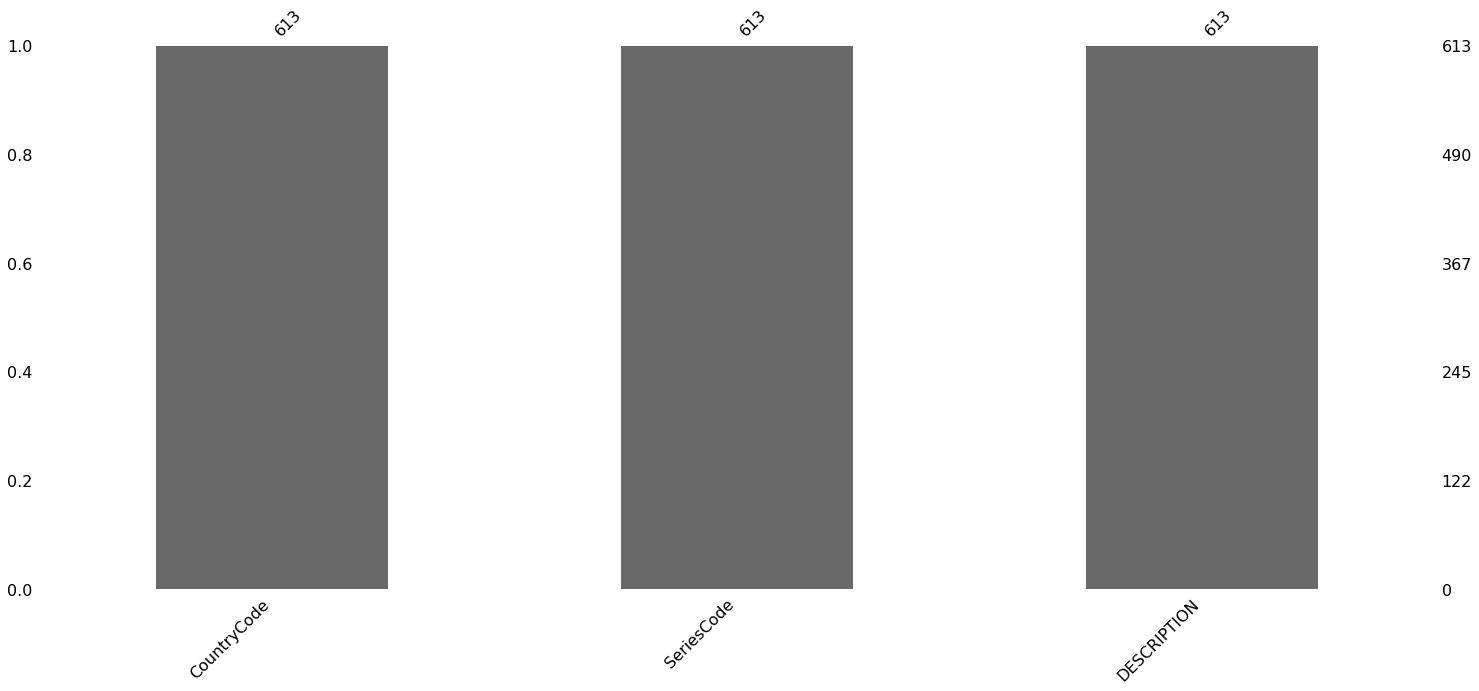

In [30]:
EdStatsCountry_Series_mod = EdStatsCountry_Series.copy()
EdStatsCountry_Series_mod = EdStatsCountry_Series_mod.drop(columns = ['Unnamed: 3'])
# On ré-affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsCountry_Series_mod)

In [31]:
# Statistiques du deuxième jeu de données
EdStatsCountry_Series_mod.describe()

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.GROW   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

 - Troisième jeu de données

Le choix des années à garder :
- J'ai décidé de garder que les années de 2000 à 2015;
- les années de 1970 à 2000 sont des années anciennes où on a perdu queslques informations(beaucoup de valeurs manquantes); 
- les années de 2020 à 2050, on a beaucoup de valeurs manquantes et ce sont des années dans le future. 
- Les années 2016 et 2017 ont beaucoup de valeurs manquantes.

In [32]:
an_p = [] #liste des années passées
[an_p.append(str(e)) for e in np.arange(1970,2000)] 
print("Liste des années passées : \n", an_p)
an_c = []
[an_c.append(str(e)) for e in np.arange(2000,2016)]
print("Liste des années qui restent : \n", an_c)


Liste des années passées : 
 ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
Liste des années qui restent : 
 ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


<AxesSubplot:>

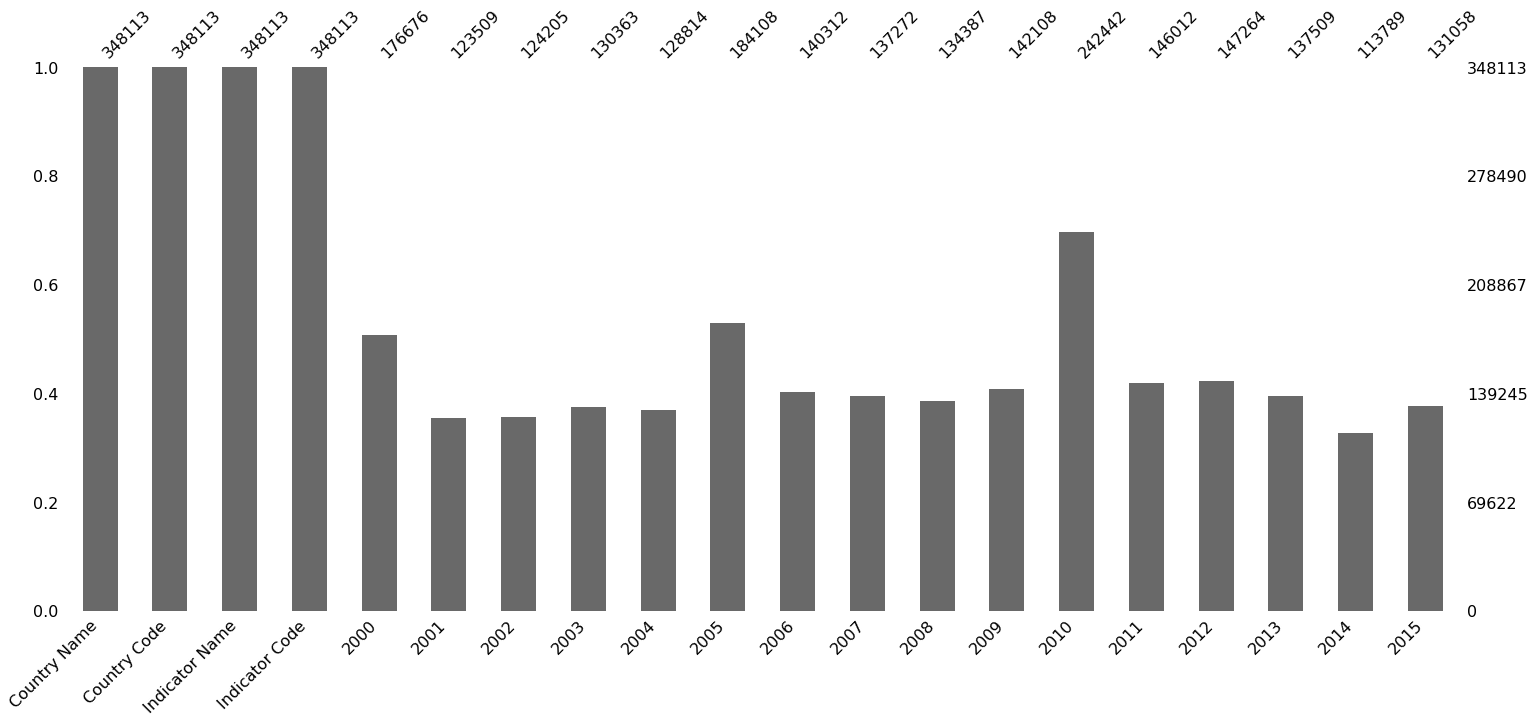

In [33]:
# J'ai laissé les années de 2000 à 2015 
EdStatsData_mod = EdStatsData.copy()
EdStatsData_mod = EdStatsData_mod.drop(columns = an_p)
EdStatsData_mod = EdStatsData_mod .loc[:,'Country Name':'2015']
EdStatsData_mod = EdStatsData_mod.dropna(how="all", subset = an_c)

# On ré-affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsData_mod)

In [34]:
# Statistiques du troisième jeu de données
EdStatsData_mod.describe()

2000          2001          2002          2003          2004  \
count  1.766760e+05  1.235090e+05  1.242050e+05  1.303630e+05  1.288140e+05   
mean   9.423384e+09  1.384867e+10  1.428299e+10  1.449393e+10  1.589729e+10   
std    4.442374e+11  5.449242e+11  5.622886e+11  5.803607e+11  6.278337e+11   
min   -6.759300e+04 -6.973700e+04 -9.214300e+04 -1.111860e+05 -1.262600e+05   
25%    5.699035e+00  1.599897e+01  1.584246e+01  1.550983e+01  1.418687e+01   
50%    5.078717e+01  8.300000e+02  9.460000e+02  3.956150e+02  3.350000e+02   
75%    3.343950e+04  1.746540e+05  1.770990e+05  1.474790e+05  1.584082e+05   
max    6.327293e+13  6.477834e+13  6.654753e+13  6.906328e+13  7.278829e+13   

               2005          2006          2007          2008          2009  \
count  1.841080e+05  1.403120e+05  1.372720e+05  1.343870e+05  1.421080e+05   
mean   1.188637e+10  1.684674e+10  1.872300e+10  2.029794e+10  1.894907e+10   
std    5.576181e+11  6.851484e+11  7.465688e+11  7.944132e+11  7.623650e+11   
min   -1.347240e+05 -3.708940e+05 -3.882170e+05 -4.088540e+05 -4.561240e+05   
25%    5.720000e+00  1.277624e+01  1.268661e+01  1.233467e+01  1.181939e+01   
50%    5.031512e+01  9.981849e+01  1.000000e+02  1.000000e+02  9.925039e+01   
75%    2.993150e+04  1.187198e+05  1.343790e+05  1.453855e+05  1.180412e+05   
max    7.624045e+13  8.031840e+13  8.469145e+13  8.711022e+13  8.677516e+13   

               2010          2011          2012          2013          2014  \
count  2.424420e+05  1.460120e+05  1.472640e+05  1.375090e+05  1.137890e+05   
mean   1.189592e+10  2.117911e+10  2.176323e+10  2.425332e+10  2.678449e+10   
std    6.218710e+11  8.555853e+11  8.833955e+11  9.513016e+11  1.023180e+12   
min   -4.969050e+05 -5.709940e+05 -6.049930e+05 -6.157480e+05 -8.900000e+01   
25%    1.322703e+00  1.216330e+01  1.100000e+01  1.306113e+01  1.614639e+01   
50%    2.046020e+01  9.853510e+01  9.759012e+01  1.000000e+02  1.000000e+02   
75%    3.121000e+03  1.065065e+05  1.038168e+05  1.426480e+05  1.636440e+05   
max    9.134676e+13  9.506314e+13  9.999473e+13  1.054580e+14  1.108060e+14   

               2015  
count  1.310580e+05  
mean   2.353720e+10  
std    9.732465e+11  
min   -2.467847e+00  
25%    4.100000e-01  
50%    5.235000e+01  
75%    6.153575e+04  
max    1.156198e+14

####  Elimination des petits pays

On commence par filtrer notre jeu de données par les indicateurs pertinents qu'on a jugé utile pour notre étude

In [35]:
# Indicateurs choisis
l_ind =  ['Population, ages 15-24, total',
          'Population, total',
          'Internet users (per 100 people)',
          'Government expenditure on education as % of GDP (%)',
          'Youth literacy rate, population 15-24 years, both sexes (%)'
         ]

In [36]:
EdStatsData_mod = EdStatsData_mod[EdStatsData_mod['Indicator Name'].isin(l_ind)]
EdStatsData_mod.head()

Country Name Country Code  \
1375           Arab World          ARB   
2533           Arab World          ARB   
3661           Arab World          ARB   
5040  East Asia & Pacific          EAS   
6198  East Asia & Pacific          EAS   

                                         Indicator Name     Indicator Code  \
1375                    Internet users (per 100 people)     IT.NET.USER.P2   
2533                                  Population, total        SP.POP.TOTL   
3661  Youth literacy rate, population 15-24 years, b...  SE.ADT.1524.LT.ZS   
5040                    Internet users (per 100 people)     IT.NET.USER.P2   
6198                                  Population, total        SP.POP.TOTL   

              2000          2001          2002          2003          2004  \
1375  1.139541e+00  1.561288e+00  2.693061e+00  3.645881e+00  7.006812e+00   
2533  2.775614e+08  2.834931e+08  2.896810e+08  2.960959e+08  3.028247e+08   
3661  8.154494e+01  8.154494e+01  8.154494e+01  8.154494e+01  8.154494e+01   
5040  5.592680e+00  7.252166e+00  8.993588e+00  1.054724e+01  1.259696e+01   
6198  2.044496e+09  2.063002e+09  2.080535e+09  2.097265e+09  2.113465e+09   

              2005          2006          2007          2008          2009  \
1375  8.393142e+00  1.165465e+01  1.420590e+01  1.859353e+01  2.297369e+01   
2533  3.098244e+08  3.171258e+08  3.246935e+08  3.324249e+08  3.401490e+08   
3661  8.896470e+01  8.896470e+01  8.896470e+01  8.896470e+01  8.896470e+01   
5040  1.466636e+01  1.661783e+01  2.076652e+01  2.525357e+01  2.951320e+01   
6198  2.129445e+09  2.145245e+09  2.160432e+09  2.175832e+09  2.190811e+09   

              2010          2011          2012          2013          2014  \
1375  2.674725e+01  2.970776e+01  3.401422e+01  3.686860e+01           NaN   
2533  3.477370e+08  3.551370e+08  3.624666e+08  3.697615e+08           NaN   
3661  8.896470e+01  8.896470e+01  8.896470e+01  8.896470e+01  8.896470e+01   
5040  3.423084e+01  3.736516e+01  4.070935e+01  4.457735e+01  4.681210e+01   
6198  2.205615e+09  2.220358e+09  2.235430e+09  2.250552e+09  2.265898e+09   

              2015  
1375           NaN  
2533           NaN  
3661           NaN  
5040  4.978792e+01  
6198  2.281203e+09

<AxesSubplot:>

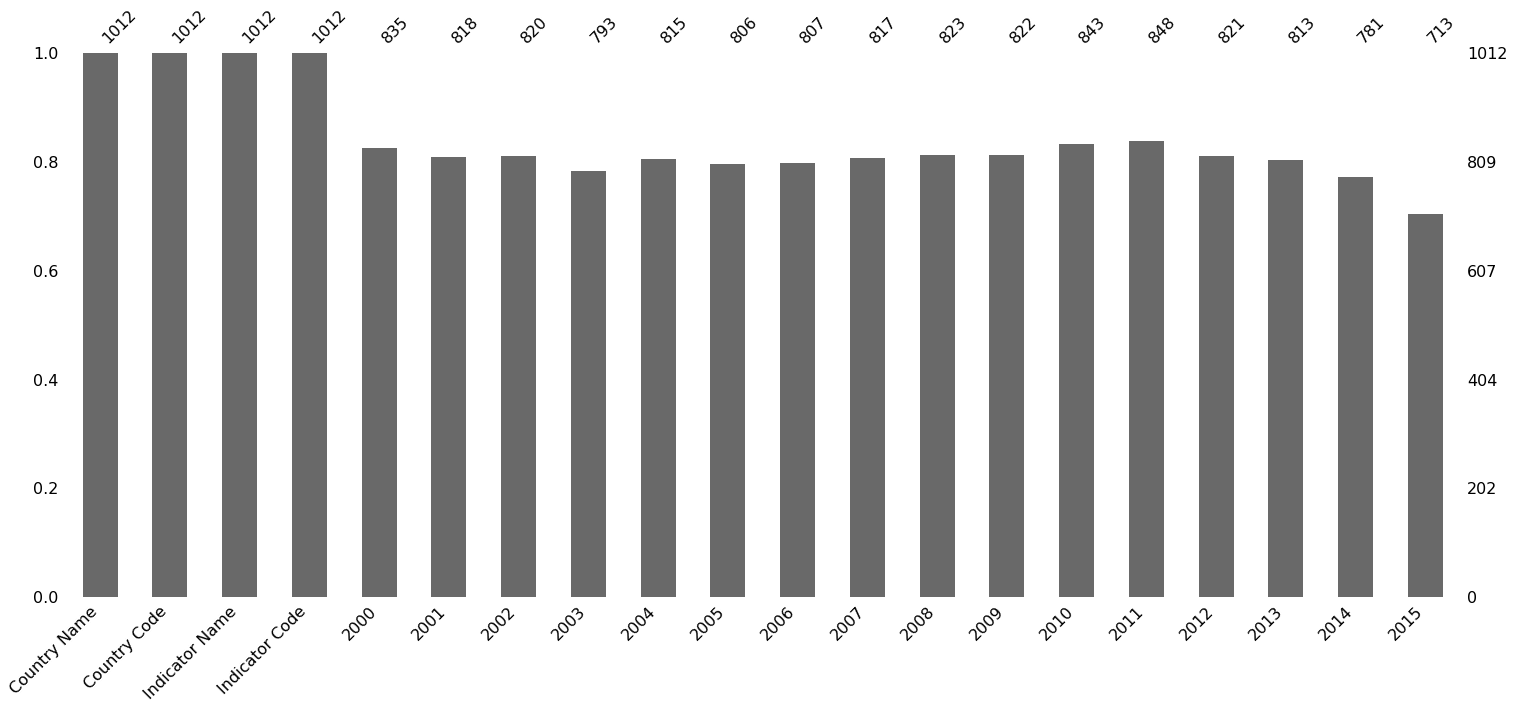

In [37]:
# On affiche les bar plots pour visualiser les taux de remplissage des indicateurs choisis
plt.figure(figsize=(10,7))
msn.bar(EdStatsData_mod)

In [38]:
EdStatsData_mod.shape

(1012, 20)

####  Elimination des petits pays

On commence par garder que les pays et on enlève les régions en utilisant le critère que seul les pays ont un unité monétaire

In [39]:
l_unit = list(EdStatsCountry['Currency Unit'].unique())
l_unit = [x for x in l_unit if str(x) != 'nan']
filtre_unit = EdStatsCountry['Currency Unit'].isin(l_unit) # A rajouter data_ù
EdStatsData_pays = EdStatsCountry[EdStatsCountry_mod['Currency Unit'].isin(l_unit)]
pays = list(EdStatsData_pays['Short Name'].unique())
print('La liste des pays:', pays, 'Le nombre de pays:', len(pays))

La liste des pays: ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equator

In [40]:
# Les pays 
EdstatsData_pays = EdStatsData_mod[EdStatsData_mod['Country Name'].isin(pays)]
EdstatsData_pays.head()

Country Name Country Code  \
92885  Afghanistan          AFG   
93000  Afghanistan          AFG   
94107  Afghanistan          AFG   
94158  Afghanistan          AFG   
95286  Afghanistan          AFG   

                                          Indicator Name     Indicator Code  \
92885  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
93000                    Internet users (per 100 people)     IT.NET.USER.P2   
94107                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
94158                                  Population, total        SP.POP.TOTL   
95286  Youth literacy rate, population 15-24 years, b...  SE.ADT.1524.LT.ZS   

             2000          2001          2002          2003          2004  \
92885         NaN           NaN           NaN           NaN           NaN   
93000         NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01   
94107   3979438.0  4.122669e+06  4.293057e+06  4.486256e+06  4.694142e+06   
94158  20093756.0  2.096646e+07  2.197992e+07  2.306485e+07  2.411898e+07   
95286         NaN           NaN           NaN           NaN           NaN   

               2005          2006        2007         2008         2009  \
92885           NaN           NaN         NaN          NaN          NaN   
93000  1.224148e+00  2.107124e+00         1.9         1.84         3.55   
94107  4.910340e+06  5.134377e+06   5367499.0   5606736.00   5848604.00   
94158  2.507080e+07  2.589345e+07  26616792.0  27294031.00  28004331.00   
95286           NaN           NaN         NaN          NaN          NaN   

               2010          2011          2012          2013          2014  \
92885  3.461490e+00  3.439140e+00  2.527540e+00  3.481400e+00  3.780280e+00   
93000  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00   
94107  6.090239e+06  6.330684e+06  6.569239e+06  6.803785e+06  7.032072e+06   
94158  2.880317e+07  2.970860e+07  3.069696e+07  3.173169e+07  3.275802e+07   
95286           NaN  4.699005e+01           NaN           NaN           NaN   

               2015  
92885  3.317540e+00  
93000  8.260000e+00  
94107  7.252785e+06  
94158  3.373649e+07  
95286           NaN

In [41]:
# Fonction qui renvoie la dernière valeur non nulle d'un indicateur
def val_rec(x):
    index = x.last_valid_index()
    res = x[index]
    return res

In [42]:
last_value = pd.DataFrame(EdstatsData_pays.apply(val_rec, axis=1)).rename(columns = {0:'Last_ind_value'})
Data_ind = EdstatsData_pays[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']].merge(last_value, left_index=True, right_index=True)
Data_ind.head()

Country Name Country Code  \
92885  Afghanistan          AFG   
93000  Afghanistan          AFG   
94107  Afghanistan          AFG   
94158  Afghanistan          AFG   
95286  Afghanistan          AFG   

                                          Indicator Name     Indicator Code  \
92885  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
93000                    Internet users (per 100 people)     IT.NET.USER.P2   
94107                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
94158                                  Population, total        SP.POP.TOTL   
95286  Youth literacy rate, population 15-24 years, b...  SE.ADT.1524.LT.ZS   

       Last_ind_value  
92885    3.317540e+00  
93000    8.260000e+00  
94107    7.252785e+06  
94158    3.373649e+07  
95286    4.699005e+01

In [43]:
Data_ind = pd.pivot_table(Data_ind, values='Last_ind_value', index=['Country Name', 'Country Code'],
                    columns=['Indicator Name'])
Data_ind.reset_index(inplace=True)
Data_ind.head()

Indicator Name    Country Name Country Code  \
0                  Afghanistan          AFG   
1                      Albania          ALB   
2                      Algeria          DZA   
3               American Samoa          ASM   
4                      Andorra          AND   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                         3.31754     
1                                                         3.53944     
2                                                         4.35425     
3                                                             NaN     
4                                                         3.25368     

Indicator Name  Internet users (per 100 people)  \
0                                      8.260000   
1                                     63.252933   
2                                     38.200000   
3                                           NaN   
4                                     96.910000   

Indicator Name  Population, ages 15-24, total  Population, total  \
0                                   7252785.0         33736494.0   
1                                    556269.0          2880703.0   
2                                   6467818.0         39871528.0   
3                                         NaN            55537.0   
4                                      8715.0            78014.0   

Indicator Name  Youth literacy rate, population 15-24 years, both sexes (%)  
0                                                        46.99005            
1                                                        99.23140            
2                                                        93.76733            
3                                                             NaN            
4                                                       100.00000

In [44]:
px.bar(Data_ind.sort_values(by = 'Population, total', ascending=False)
       , x = 'Country Name', y = 'Population, total', log_y=True)

**Graphiquement** : On remarque que les pays de faible population ont une population total inférieur à 1M 

In [45]:
# On garde que les pays qui ont une population de 1M ou plus
Data_ind = Data_ind[Data_ind['Population, total'] >= 1000000]
Data_ind.head()

Indicator Name Country Name Country Code  \
0               Afghanistan          AFG   
1                   Albania          ALB   
2                   Algeria          DZA   
5                    Angola          AGO   
7                 Argentina          ARG   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                         3.31754     
1                                                         3.53944     
2                                                         4.35425     
5                                                         3.47623     
7                                                         5.32549     

Indicator Name  Internet users (per 100 people)  \
0                                      8.260000   
1                                     63.252933   
2                                     38.200000   
5                                     12.400000   
7                                     68.043064   

Indicator Name  Population, ages 15-24, total  Population, total  \
0                                   7252785.0         33736494.0   
1                                    556269.0          2880703.0   
2                                   6467818.0         39871528.0   
5                                   4259352.0         27859305.0   
7                                   6886530.0         43417765.0   

Indicator Name  Youth literacy rate, population 15-24 years, both sexes (%)  
0                                                        46.99005            
1                                                        99.23140            
2                                                        93.76733            
5                                                        77.43113            
7                                                        99.30000

In [46]:
# On récupère la liste des pays qui ont une grande population
pays_g = list(Data_ind['Country Name'].unique())
len(pays_g)

147

<AxesSubplot:xlabel='Indicator Name'>

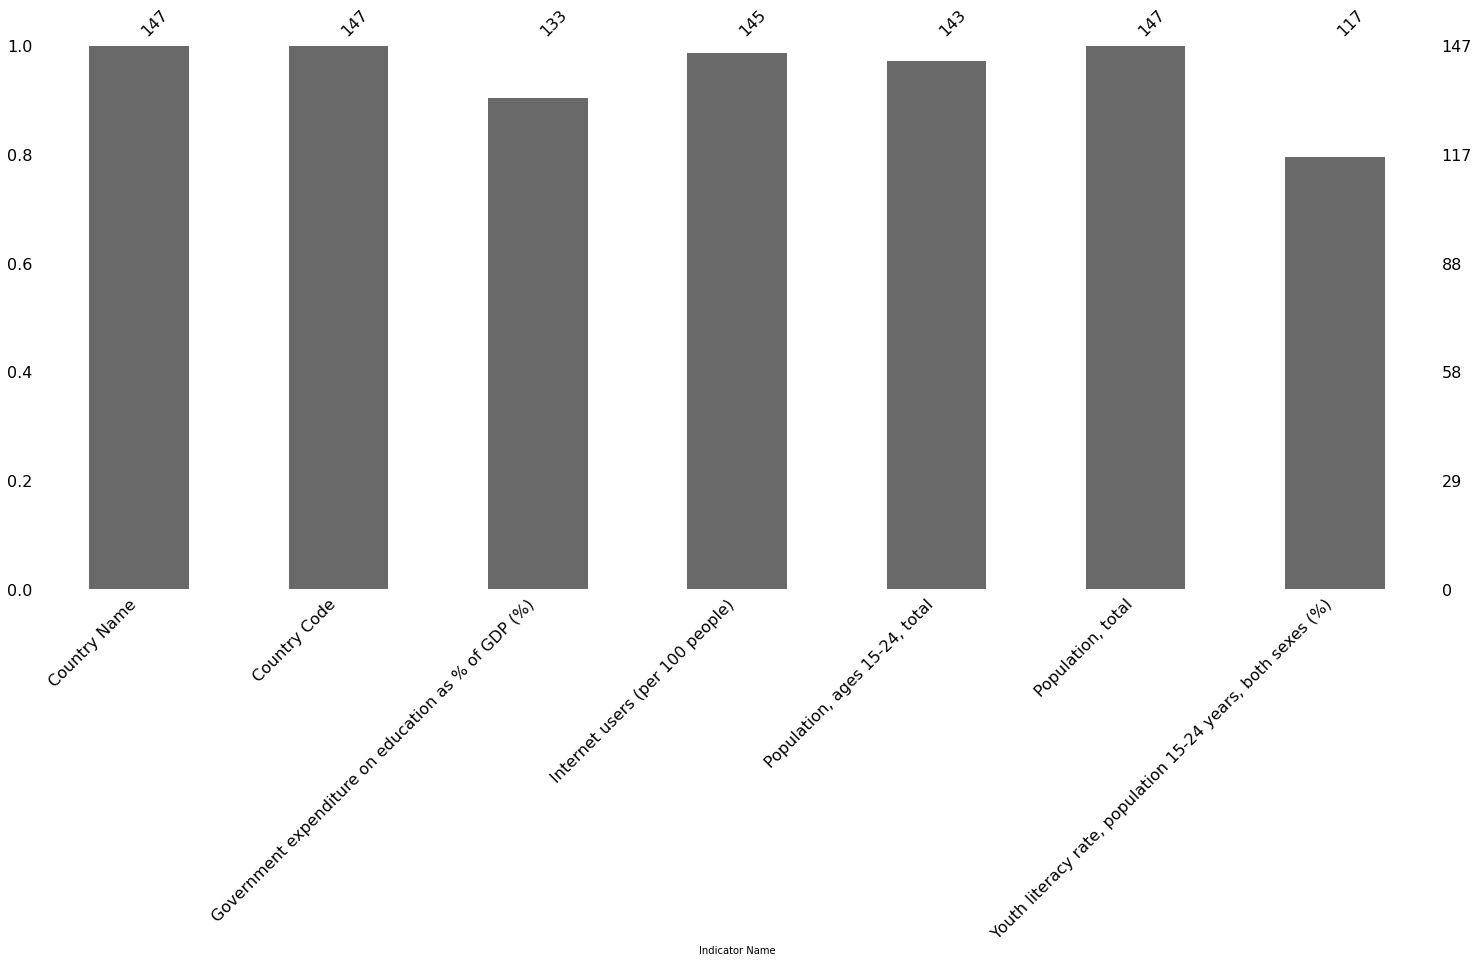

In [47]:
# On affiche les bar plots pour visualiser les taux de remplissage des indicateurs choisis
plt.figure(figsize=(10,7))
msn.bar(Data_ind)

    On remarque que les indicateurs choisis ont tous un taux de remplissage élevé 

- **Statistique des indicateurs choisis par région et par pays**

In [48]:
# Statistiques des indicateurs choisis par pays 
Data_ind.describe()

Indicator Name  Government expenditure on education as % of GDP (%)  \
count                                                  133.000000     
mean                                                     4.645740     
std                                                      1.930161     
min                                                      1.099720     
25%                                                      3.208170     
50%                                                      4.599870     
75%                                                      5.499550     
max                                                     12.837270     

Indicator Name  Internet users (per 100 people)  \
count                                145.000000   
mean                                  46.671443   
std                                   28.624308   
min                                    1.083733   
25%                                   20.680148   
50%                                   48.884644   
75%                                   71.378000   
max                                   96.810300   

Indicator Name  Population, ages 15-24, total  Population, total  \
count                            1.430000e+02       1.470000e+02   
mean                             7.798005e+06       4.596481e+07   
std                              2.684407e+07       1.598123e+08   
min                              1.212990e+05       1.160985e+06   
25%                              7.101590e+05       4.636268e+06   
50%                              1.800366e+06       1.057595e+07   
75%                              5.315339e+06       3.133779e+07   
max                              2.441202e+08       1.371220e+09   

Indicator Name  Youth literacy rate, population 15-24 years, both sexes (%)  
count                                                  117.000000            
mean                                                    86.805947            
std                                                     18.282011            
min                                                     23.523780            
25%                                                     80.574440            
50%                                                     97.614060            
75%                                                     99.243350            
max                                                    100.000000

In [51]:
# Statistique par région et pour chaque indicateur choisi
data_join = Data_ind.merge(EdStatsCountry_mod, on ='Country Code')
data_reg = data_join.groupby('Region')['Government expenditure on education as % of GDP (%)','Internet users (per 100 people)','Population, ages 15-24, total',
                                          'Population, total','Youth literacy rate, population 15-24 years, both sexes (%)']
data_reg.describe()

<ipython-input-51-f2a78aa0742b>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Government expenditure on education as % of GDP (%)  \
                                                                         count   
Region                                                                           
East Asia & Pacific                                                      14.0    
Europe & Central Asia                                                    41.0    
Latin America & Caribbean                                                21.0    
Middle East & North Africa                                               12.0    
North America                                                             2.0    
South Asia                                                                6.0    
Sub-Saharan Africa                                                       37.0    

                                                                             \
                                mean       std      min       25%       50%   
Region                                                                        
East Asia & Pacific         4.282741  1.594253  1.90197  3.276618  3.860355   
Europe & Central Asia       4.973816  1.442339  1.98331  4.089020  4.952190   
Latin America & Caribbean   5.175046  2.220432  2.04457  3.978650  4.955400   
Middle East & North Africa  4.231753  1.474569  1.32232  3.372412  4.657315   
North America               5.331000  0.070400  5.28122  5.306110  5.331000   
South Asia                  2.942530  0.797960  1.95726  2.296025  2.982140   
Sub-Saharan Africa          4.492552  2.451702  1.09972  2.666170  3.797460   

                                                \
                                 75%       max   
Region                                           
East Asia & Pacific         5.160595   7.77500   
Europe & Central Asia       5.527380   8.62711   
Latin America & Caribbean   5.867750  12.83727   
Middle East & North Africa  5.167867   6.25036   
North America               5.355890   5.38078   
South Asia                  3.613505   3.84236   
Sub-Saharan Africa          6.029550  11.36114   

                           Internet users (per 100 people)             ...  \
                                                     count       mean  ...   
Region                                                                 ...   
East Asia & Pacific                                   17.0  48.171816  ...   
Europe & Central Asia                                 43.0  69.435026  ...   
Latin America & Caribbean                             22.0  47.770249  ...   
Middle East & North Africa                            16.0  60.565176  ...   
North America                                          2.0  81.512101  ...   
South Asia                                             6.0  18.371726  ...   
Sub-Saharan Africa                                    39.0  17.166394  ...   

                           Population, total                \
                                         75%           max   
Region                                                       
East Asia & Pacific             9.171330e+07  1.371220e+09   
Europe & Central Asia           1.709097e+07  8.168661e+07   
Latin America & Caribbean       1.738512e+07  2.059621e+08   
Middle East & North Africa      2.194053e+07  3.987153e+07   
North America                   2.496346e+08  3.208966e+08   
South Asia                      1.823356e+08  1.309054e+09   
Sub-Saharan Africa              2.507127e+07  1.811817e+08   

                           Youth literacy rate, population 15-24 years, both sexes (%)  \
                                                                                 count   
Region                                                                                   
East Asia & Pacific                                                      13.0            
Europe & Central Asia                                                    25.0            
Latin America & Caribbean                                     

 - Quatrième jeu de données

<AxesSubplot:>

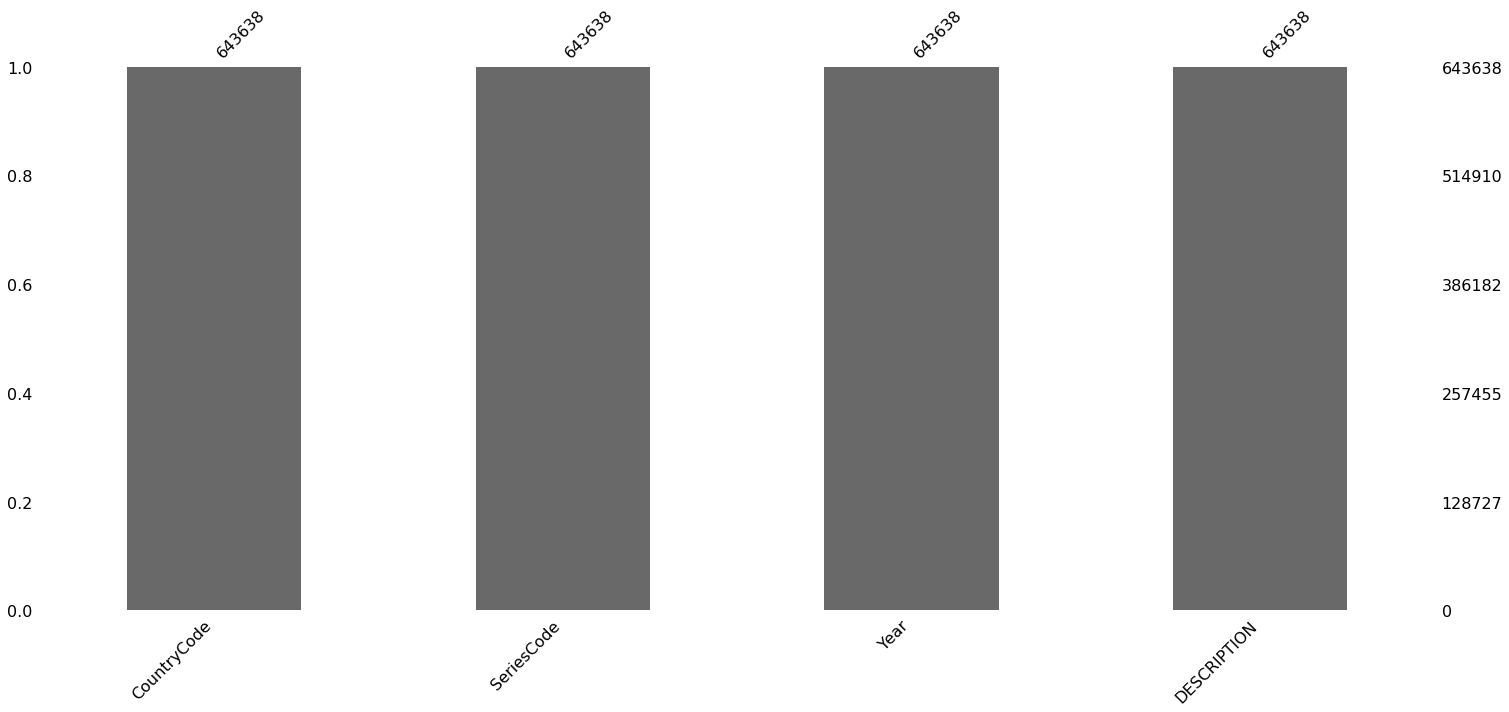

In [52]:
EdStatsFootNote_mod = EdStatsFootNote.copy()
EdStatsFootNote_mod = EdStatsFootNote_mod.drop(columns = ['Unnamed: 4'])
# On ré-affiche les valeurs manquantes avec la méthode bar chart
plt.figure(figsize=(10,7))
msn.bar(EdStatsFootNote_mod)

In [53]:
# Statistiques du quatrième jeu de données
EdStatsFootNote_mod.describe()

CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

 - Dernier jeu de données

<AxesSubplot:>

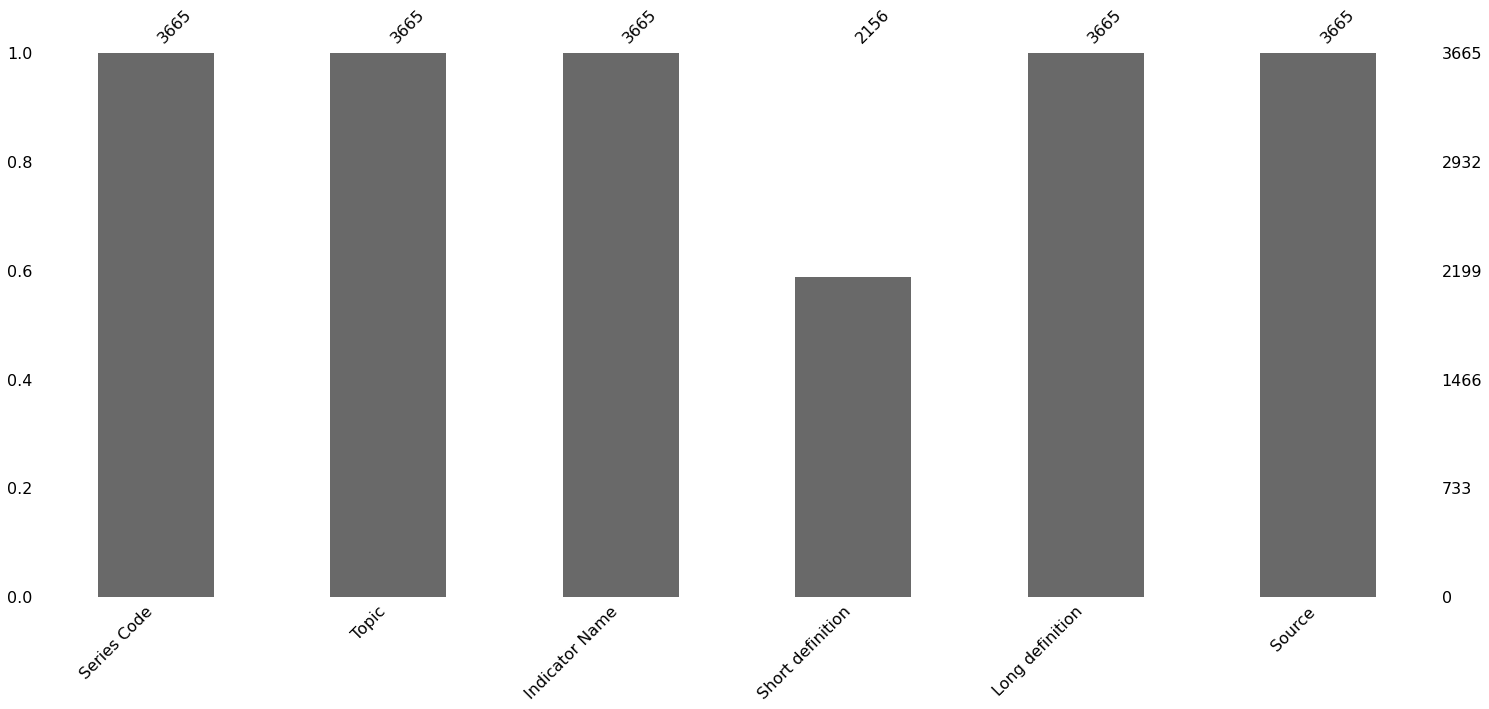

In [54]:
EdStatsSeries_mod = EdStatsSeries.copy()
EdStatsSeries_mod = EdStatsSeries_mod.dropna(how='all', axis=1)
EdStatsSeries_mod = EdStatsSeries_mod.drop(columns=['Periodicity','Base Period','Other notes','Aggregation method',
                                                    'Limitations and exceptions','General comments',
                                                    'Statistical concept and methodology',
                                                    'Development relevance','Related source links'])
plt.figure(figsize=(10,7))
msn.bar(EdStatsSeries_mod)

In [55]:
# Statistiques du dernier jeu de données
EdStatsSeries_mod.describe()

Series Code              Topic  \
count              3665               3665   
unique             3665                 37   
top     PRJ.MYS.1519.MA  Learning Outcomes   
freq                  1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               3665   
top     Adult literacy rate, population 15+ years, gen...   
freq                                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                                          Long definition  \
count                                                3665   
unique                                               2060   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                                 Source  
count                              3665  
unique                               31  
top     UNESCO Institute for Statistics  
freq                               1269

## C- Analyse exploratoire

In [56]:
# On calcule le pourcentage de la population jeune de 15-24 pour chaque pays
Data_ind['Taux_pop_jeune'] = (Data_ind['Population, ages 15-24, total']/Data_ind['Population, total'])*100
Data_ind.head()

Indicator Name Country Name Country Code  \
0               Afghanistan          AFG   
1                   Albania          ALB   
2                   Algeria          DZA   
5                    Angola          AGO   
7                 Argentina          ARG   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                         3.31754     
1                                                         3.53944     
2                                                         4.35425     
5                                                         3.47623     
7                                                         5.32549     

Indicator Name  Internet users (per 100 people)  \
0                                      8.260000   
1                                     63.252933   
2                                     38.200000   
5                                     12.400000   
7                                     68.043064   

Indicator Name  Population, ages 15-24, total  Population, total  \
0                                   7252785.0         33736494.0   
1                                    556269.0          2880703.0   
2                                   6467818.0         39871528.0   
5                                   4259352.0         27859305.0   
7                                   6886530.0         43417765.0   

Indicator Name  Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                        46.99005             
1                                                        99.23140             
2                                                        93.76733             
5                                                        77.43113             
7                                                        99.30000             

Indicator Name  Taux_pop_jeune  
0                    21.498336  
1                    19.310182  
2                    16.221646  
5                    15.288795  
7                    15.861088

In [57]:
px.scatter(data_join, x='Population, ages 15-24, total', y='Internet users (per 100 people)', 
           log_x = True, hover_data = ['Country Name'], color = 'Region')

**Commentaire**
  - On remarque que les pays qui se trouve dans le rectangle en haut à droite (à partir 5M de population 15-24 ans et à partir de 50% par exemple) ont un grand taux de d'utilisation d'internet et un grand nombre de populations jeunes (de 15_24 ans). Ces pays représentent des potentiels clients pour le projet d'expansion à l'international
  
  - On remarque aussi que la plupart de ces pays se retouvent dans les régions : "Europe et Central Asia", "East Asia & Pacific" et "Latin America & Caribbean.

In [58]:
# La liste des potentiel pays (clients) pour le projet d'expansion à l'international
data_f = data_join[data_join['Population, ages 15-24, total'] >= 5000000]
data_f = data_f[data_f['Internet users (per 100 people)'] >= 50]
pays_recomd = list(data_f['Country Name'].unique())
region_recomd = list(data_f['Region'].unique())
print('Liste des pays à recommander : \n', pays_recomd)
print('\n')
print('Liste région à recommander : \n',  region_recomd)

Liste des pays à recommander : 
 ['Argentina', 'Brazil', 'China', 'Colombia', 'France', 'Germany', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Morocco', 'Philippines', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States']


Liste région à recommander : 
 ['Latin America & Caribbean', 'East Asia & Pacific', 'Europe & Central Asia', 'Middle East & North Africa', 'Sub-Saharan Africa', 'North America']


## D- L'évolution des indicateurs 

### 1- Indicateur Internet :

In [60]:
dt_int = EdstatsData_pays[EdstatsData_pays["Country Name"].isin(pays_recomd)]
dt_int = dt_int[dt_int['Indicator Name'] == 'Internet users (per 100 people)'].drop(columns=['Country Code','Indicator Name','Indicator Code'])
dt_int = dt_int.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="Value")
fig = px.line(dt_int, x='Year', y='Value', color= 'Country Name',title="Taux d'utilisation d'internet")
fig.show()

### 2- Indicateur "Population de 15-24 ans" 

In [61]:
dt_popj = EdstatsData_pays[EdstatsData_pays["Country Name"].isin(pays_recomd)]
dt_popj = dt_popj[dt_popj['Indicator Name'] == 'Population, ages 15-24, total'].drop(columns=['Country Code','Indicator Name','Indicator Code'])
dt_popj = dt_popj.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="Value")
fig = px.line(dt_popj, x='Year', y='Value', color= 'Country Name',title='Population 15-24', log_y = True)
fig.show()

### 3- Indicateur "Population total"

In [62]:
dt_popT = EdstatsData_pays[EdstatsData_pays["Country Name"].isin(pays_recomd)]
dt_popT  = dt_popT [dt_popT ['Indicator Name'] == 'Population, total'].drop(columns=['Country Code','Indicator Name','Indicator Code'])
dt_popT  = dt_popT.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="Value")
fig = px.line(dt_popT, x='Year', y='Value', color= 'Country Name',title='Population Total')
fig.show()